In [1]:
# copy paste this code to the beginning of your script to set the plotting style for a one column figure

# copy paste this code to the beginning of your script to set the plotting style for a three column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    "figure.constrained_layout.use": True
})

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,2.5)  # (width, height) in inches, change height but not width
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "best" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
# plt.rcParams["lines.markeredgewidth"] = 0.7
plt.rcParams["lines.markersize"] = 4 #data point size

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7

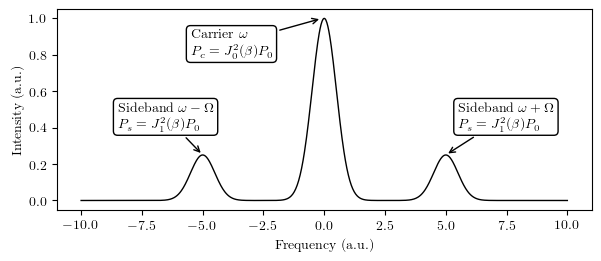

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Frequency axis (arbitrary units)
freq = np.linspace(-10, 10, 1000)

# Parameters
carrier_center = 0       # Center frequency for the carrier
modulation_index = 0.5   # Smaller index means weaker sidebands
sideband_spacing = 5     # Frequency spacing between sidebands and carrier
carrier_height = 1.0
sideband_height = carrier_height * (modulation_index**2)

# Intensity profile using Gaussian peaks
def gaussian(x, center, height, width=0.5):
    return height * np.exp(-((x - center) ** 2) / (2 * width ** 2))

intensity = (
    gaussian(freq, carrier_center, carrier_height) +
    gaussian(freq, carrier_center - sideband_spacing, sideband_height) +
    gaussian(freq, carrier_center + sideband_spacing, sideband_height)
)

# Plotting
plt.plot(freq, intensity, label="Intensity profile", color='black')
# plt.title("Frequency Scan of Frequency-Modulated Laser via EOM")
plt.xlabel("Frequency (a.u.)")
plt.ylabel("Intensity (a.u.)")
plt.annotate(xy=(-0.1, 1.0), xytext=(-5.5, 0.8),text=r"Carrier $\omega$" + "\n" + r"$P_c=J_0^2(\beta)P_0$",
                arrowprops=dict(arrowstyle="->", lw=1, color='black'),
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.annotate(xy=(-5.0, 0.25), xytext=(-8.5, 0.4), text=r"Sideband $\omega-\Omega$" + "\n" + r"$P_s=J_1^2(\beta)P_0$",
                arrowprops=dict(arrowstyle="->", lw=1, color='black'),
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))
plt.annotate(xy=(5.0, 0.25), xytext=(5.5, 0.4), text=r"Sideband $\omega+\Omega$" + "\n" + r"$P_s=J_1^2(\beta)P_0$",
                arrowprops=dict(arrowstyle="->", lw=1, color='black'),
                bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='white'))


plt.grid(False)

plt.savefig("SidebandsCarrierFigure.pdf", dpi=1200)